In [18]:
import matplotlib.pyplot as mplt
import plotly as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,KernelDensity
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

In [4]:
data = pd.read_csv('data/treino.csv')

In [5]:
pd.DataFrame(data)

,id,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,0,6.564539,0.005402,-0.046048,0.082720,0.025483,0.012840,0.012074,0.015706,0.019474,...,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645,0.004731,teens
1,1,6.272916,-0.050610,0.079147,0.051565,0.039750,0.024608,0.007396,-0.000113,0.010413,...,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009,-0.002465,twenties
2,2,6.109420,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,...,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865,-0.006467,fourties
3,3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.007810,-0.059597,...,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818,-0.003198,twenties
4,4,5.959087,0.199252,-0.126957,0.125780,-0.004105,-0.054833,-0.035830,-0.000890,-0.051578,...,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199,-0.012306,teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,5.984490,0.053315,-0.042023,0.047830,-0.019244,-0.046589,0.010900,-0.056706,-0.004145,...,0.003048,0.000266,-0.005563,0.001938,-0.003351,0.005081,-0.007575,0.005039,-0.010748,twenties
3496,3496,6.394997,0.071473,0.004922,0.005652,0.039168,-0.041011,0.015375,-0.058066,-0.004499,...,0.001090,-0.003133,-0.013673,-0.003264,-0.001776,-0.018846,0.005435,-0.009341,-0.003002,fifties
3497,3497,5.914190,0.345414,-0.117653,0.063194,-0.086075,0.086425,-0.175410,-0.005695,-0.025939,...,0.016025,-0.010143,-0.000345,0.000274,-0.002794,-0.002423,0.000475,0.003006,-0.010567,fourties
3498,3498,5.426918,0.271221,-0.023893,0.124361,-0.077775,0.033935,-0.113375,-0.007114,-0.022291,...,-0.001238,-0.006894,0.000604,-0.001819,-0.003945,-0.001115,-0.006675,-0.003233,-0.009256,teens


In [6]:
X = data.to_numpy()[:,1:40]
Y = data.to_numpy()[:,40]

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,6.564539,0.005402,-0.046048,0.08272,0.025483,0.01284,0.012074,0.015706,0.019474,-0.000007,...,0.003625,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645,0.004731
1,6.272916,-0.05061,0.079147,0.051565,0.03975,0.024608,0.007396,-0.000113,0.010413,-0.00969,...,0.009418,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009,-0.002465
2,6.10942,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,0.001421,...,0.014951,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865,-0.006467
3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.00781,-0.059597,0.002855,...,-0.011383,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818,-0.003198
4,5.959087,0.199252,-0.126957,0.12578,-0.004105,-0.054833,-0.03583,-0.00089,-0.051578,-0.050316,...,-0.024509,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199,-0.012306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,5.98449,0.053315,-0.042023,0.04783,-0.019244,-0.046589,0.0109,-0.056706,-0.004145,-0.027816,...,-0.005505,0.003048,0.000266,-0.005563,0.001938,-0.003351,0.005081,-0.007575,0.005039,-0.010748
3496,6.394997,0.071473,0.004922,0.005652,0.039168,-0.041011,0.015375,-0.058066,-0.004499,-0.003758,...,0.010728,0.00109,-0.003133,-0.013673,-0.003264,-0.001776,-0.018846,0.005435,-0.009341,-0.003002
3497,5.91419,0.345414,-0.117653,0.063194,-0.086075,0.086425,-0.17541,-0.005695,-0.025939,-0.050318,...,-0.014447,0.016025,-0.010143,-0.000345,0.000274,-0.002794,-0.002423,0.000475,0.003006,-0.010567
3498,5.426918,0.271221,-0.023893,0.124361,-0.077775,0.033935,-0.113375,-0.007114,-0.022291,-0.024963,...,-0.011851,-0.001238,-0.006894,0.000604,-0.001819,-0.003945,-0.001115,-0.006675,-0.003233,-0.009256


In [8]:
np.array(data.isna().sum()).T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler_dataset = MinMaxScaler()
scalerX = scaler_dataset.fit_transform(X)

In [46]:
pd.DataFrame(scalerX)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.967589,0.348345,0.625892,0.382087,0.753104,0.551894,0.700003,0.649269,0.743177,0.480683,...,0.683073,0.593680,0.699463,0.398751,0.808601,0.398192,0.784909,0.381566,0.551883,0.746288
1,0.909447,0.289788,0.807908,0.316473,0.787387,0.576844,0.685067,0.597411,0.711067,0.442345,...,0.759118,0.538286,0.667254,0.392440,0.682287,0.384134,0.669303,0.341291,0.598397,0.598295
2,0.876850,0.498735,0.657173,0.331624,0.751234,0.513523,0.623884,0.716802,0.262560,0.486335,...,0.831736,0.515130,0.658585,0.405251,0.659780,0.382883,0.732570,0.369259,0.583287,0.515992
3,0.809130,0.467092,0.485203,0.768165,0.345112,0.657487,0.546269,0.572176,0.462961,0.492012,...,0.486087,0.476387,0.553706,0.239546,0.636214,0.266223,0.568546,0.226207,0.442993,0.583222
4,0.846878,0.551006,0.508263,0.472774,0.682005,0.408415,0.547049,0.594863,0.491381,0.281491,...,0.313795,0.392001,0.391275,0.286091,0.549023,0.184752,0.681438,0.240712,0.612684,0.395895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.851942,0.398436,0.631745,0.308606,0.645625,0.425894,0.696254,0.411885,0.659473,0.370575,...,0.563236,0.573160,0.631750,0.287596,0.722931,0.327701,0.771021,0.239929,0.758012,0.427955
3496,0.933787,0.417419,0.699996,0.219777,0.785989,0.437720,0.710544,0.407427,0.658221,0.465829,...,0.776309,0.548504,0.593866,0.199342,0.652483,0.348671,0.418251,0.401894,0.504336,0.587244
3497,0.837927,0.703810,0.521788,0.340964,0.485031,0.707907,0.101381,0.579111,0.582242,0.281481,...,0.445872,0.736596,0.515727,0.344370,0.700394,0.335122,0.660387,0.340150,0.722140,0.431665
3498,0.740777,0.626245,0.658103,0.469785,0.504977,0.596618,0.299455,0.574459,0.595168,0.381873,...,0.479942,0.519183,0.551942,0.354698,0.672048,0.319797,0.679668,0.251136,0.612084,0.458641


In [47]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

Y_new = labelEncoder.fit_transform(Y)
pd.DataFrame(Y_new).T

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,2,4,1,4,2,4,2,4,2,2,...,2,0,1,0,1,4,0,1,2,1


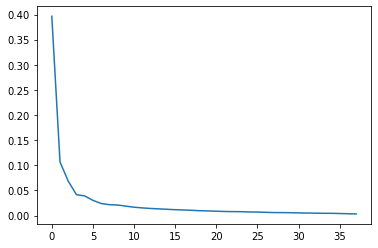

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
pca.fit(scalerX)
mplt. plot(pca.explained_variance_ratio_)

In [64]:
X_new = pca.fit_transform(scalerX)
X_new = X_new[:,0:15]
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.306814,-0.220599,-0.204160,-0.517595,-0.249718,0.009671,-0.086867,-0.131163,-0.119221,-0.005353,-0.134796,0.000900,-0.006759,-0.141812,-0.049544
1,-0.438091,-0.307837,-0.247299,-0.162123,-0.199960,-0.101046,-0.051813,-0.011780,-0.008875,0.025798,-0.027618,-0.094750,0.044526,-0.069184,0.034949
2,-0.399007,-0.005743,-0.390070,-0.015216,0.310552,0.003623,-0.233309,0.380934,0.159119,0.205811,0.037435,-0.010487,0.148013,0.218697,-0.128478
3,0.024955,0.415901,-0.035684,-0.051225,0.075716,-0.103229,-0.006860,-0.057188,0.209069,0.020864,-0.017345,-0.057466,0.046710,0.003873,-0.010766
4,-0.202380,-0.008718,0.361526,0.203808,0.035917,-0.128774,0.178792,-0.093234,0.253358,0.215063,0.063939,0.022914,0.059490,0.034510,-0.017110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-0.434869,-0.209051,0.191179,0.037246,-0.111242,0.093950,-0.008529,-0.036901,-0.075614,0.011672,0.149156,-0.022138,-0.057483,-0.122186,0.057354
3496,-0.303180,-0.149439,-0.246159,0.029007,-0.234586,0.332844,-0.077384,-0.205068,0.008918,0.046038,0.026017,0.138063,0.101591,-0.174731,0.227587
3497,0.061863,0.068127,0.469660,0.247386,-0.063713,-0.194112,0.217558,0.189488,-0.178078,0.042787,-0.149952,0.224011,-0.173974,-0.206531,-0.206580
3498,-0.110669,0.190414,0.050514,0.118149,0.187555,-0.129485,0.078434,0.086399,0.071203,0.034326,-0.063969,0.034234,-0.198144,-0.059330,0.023521


# Train Dataset

In [82]:
models = [KNeighborsClassifier(n_neighbors=2), KernelDensity(kernel='gaussian', bandwidth=0.01),
          SVC(kernel='rbf'),GaussianMixture(n_components=2, random_state=0),GaussianNB()]

folders = 10
bestAcuracia = 0
acuracias = np.zeros((folders,5))
i = 0
train_x, test_x, train_y, test_y = train_test_split(X_new, Y_new, test_size=0.3)
for model in models:
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    acuracias[:,i] = cross_val_score(model, train_x, train_y, cv=cv)
    nome_modelo = type(model).__name__ 
    print('Modelo: {} | Média acurácia: {:.2} | Desvio acurácia: {:.2}'.format(nome_modelo,
                                    np.mean(acuracias[:,i]), np.std(acuracias[:,i])))
    i = i + 1
    
  

Modelo: KNeighborsClassifier | Média acurácia: 0.87 | Desvio acurácia: 0.0082
Modelo: KernelDensity | Média acurácia: -1.8e+05 | Desvio acurácia: 1e+04
Modelo: SVC | Média acurácia: 0.83 | Desvio acurácia: 0.013
Modelo: GaussianMixture | Média acurácia: 8.2 | Desvio acurácia: 0.23
Modelo: GaussianNB | Média acurácia: 0.65 | Desvio acurácia: 0.017


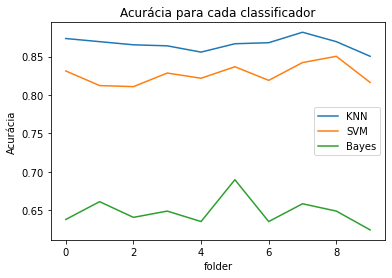

In [83]:
mplt.plot(acuracias[:,0], label= 'KNN')
mplt.plot(acuracias[:,2], label = 'SVM')
mplt.plot(acuracias[:,4], label = 'Bayes')

mplt.ylabel("Acurácia")
mplt.xlabel("folder")
mplt.title("Acurácia para cada classificador")

mplt.legend()

In [105]:
acuracia = pd.DataFrame(acuracias)
acuracia = acuracia.rename(columns={0:'KNN', 1:'KDE', 2:'SVM', 3:'Mistura gaussiana', 4: 'Bayes'})

media = pd.DataFrame(acuracia.mean()).T
media =media.rename(index = {0: 'media'})
std = pd.DataFrame(acuracia.std()).T
std = std.rename(index = {0: 'desvio padrão'},)

acuracia = pd.concat([acuracia, media])
acuracia = pd.concat([acuracia, std])
acuracia


,KNN,KDE,SVM,Mistura gaussiana,Bayes
0,0.873469,-188194.029307,0.831293,8.071395,0.638095
1,0.869388,-179243.691231,0.812245,8.447276,0.661224
2,0.865306,-176569.820987,0.810884,8.525116,0.640816
3,0.863946,-180777.376723,0.828571,8.287971,0.648980
4,0.855782,-192720.253637,0.821769,7.871844,0.635374
5,0.866667,-175116.608010,0.836735,8.362254,0.689796
6,0.868027,-193290.638627,0.819048,7.767248,0.635374
7,0.881633,-184059.183957,0.842177,8.123673,0.658503
8,0.869388,-158157.855026,0.850340,8.373683,0.648980
9,0.850340,-170464.806914,0.816327,8.159133,0.624490


In [67]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(train_x, train_y)

yAprox = KNN.predict(test_x)

In [68]:
accuracy_score(test_y,yAprox)

0.8838095238095238

In [69]:
yAprox = KNN.predict(train_x)

In [70]:
accuracy_score(train_y,yAprox)

0.9453061224489796

# Validação do modelo escolhido

In [106]:
validacao = pd.read_csv('data/validacao.csv')
np.array(validacao.isna().sum()).T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [107]:
scalerValidacao = scaler_dataset.fit_transform(validacao)
pd.DataFrame(scalerValidacao)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.891202,0.499335,0.642220,0.412899,0.702616,0.445274,0.634282,0.425816,0.340719,...,0.411936,0.449738,0.678560,0.198770,0.661462,0.240063,0.664634,0.263055,0.587923,0.414236
1,0.000667,0.713614,0.570830,0.458195,0.694077,0.303579,0.584172,0.512802,0.629762,0.408919,...,0.500877,0.579135,0.582174,0.265802,0.525255,0.213029,0.488951,0.186138,0.569351,0.150374
2,0.001334,0.743454,0.241204,0.853494,0.420609,0.695264,0.509668,0.642744,0.602476,0.439162,...,0.698004,0.644448,0.697889,0.468081,0.657387,0.331697,0.661813,0.386285,0.634176,0.626673
3,0.002001,0.772863,0.560724,0.353464,0.646719,0.524129,0.632644,0.391015,0.391367,0.340356,...,0.352942,0.511300,0.618280,0.263384,0.625887,0.297080,0.682627,0.264253,0.597619,0.294076
4,0.002668,0.790506,0.632000,0.417618,0.636808,0.392697,0.788381,0.412350,0.390408,0.402557,...,0.475957,0.624918,0.615399,0.187289,0.683469,0.163269,0.594676,0.160096,0.538098,0.364592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.997332,0.723962,0.439665,0.578383,0.288778,0.619669,0.534117,0.803078,0.620771,0.316005,...,0.750612,0.549827,0.607332,0.399575,0.646421,0.328399,0.707271,0.248300,0.731617,0.345332
1496,0.997999,0.763902,0.643670,0.381943,0.583272,0.339101,0.804183,0.641294,0.647193,0.513216,...,0.487613,0.492006,0.579507,0.184670,0.470819,0.213769,0.475235,0.243091,0.630502,0.536253
1497,0.998666,0.836440,0.265958,0.625509,0.384528,0.660097,0.559202,0.653465,0.552791,0.584119,...,0.637168,0.559267,0.706959,0.323265,0.676711,0.316562,0.657086,0.313234,0.742223,0.585610
1498,0.999333,0.917769,0.465402,0.690573,0.277057,0.710237,0.574131,0.753871,0.584062,0.575639,...,0.668450,0.617298,0.686784,0.258877,0.547010,0.192694,0.433379,0.359076,0.584843,0.683530


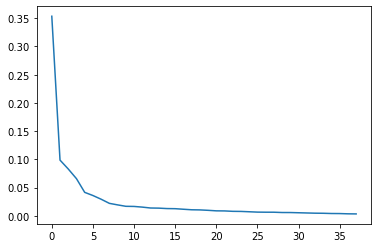

In [110]:
X_validacao = pca.fit_transform(scalerValidacao)
X_validacao = X_validacao[:,0:15]
mplt. plot(pca.explained_variance_ratio_)

In [111]:
result = KNN.predict(X_validacao)
result = labelEncoder.inverse_transform(result)

In [112]:
resultDataset = validacao
resultDataset['label'] = result
resultDataset

,id,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,label
0,3500,6.281532,0.078875,-0.013507,0.060021,0.007168,-0.060195,-0.025819,-0.022116,-0.056822,...,-0.009044,-0.000470,-0.010035,-0.003005,-0.004482,0.000577,-0.007103,-0.004305,-0.007373,teens
1,3501,5.432066,0.142372,-0.125442,0.195959,-0.156531,0.004840,-0.059756,0.021767,-0.040690,...,0.000376,-0.008459,-0.004056,-0.013167,-0.006275,-0.010601,-0.012883,-0.005265,-0.017870,teens
2,3502,5.574803,-0.150383,0.115002,0.063748,0.004152,-0.030044,-0.023455,0.015896,-0.033536,...,0.005132,0.001132,0.013986,-0.003309,0.001597,0.000398,0.002158,-0.001913,0.001077,twenties
3,3503,5.715475,0.133397,-0.189146,0.173063,-0.066054,0.027535,-0.093779,-0.029529,-0.056908,...,-0.004562,-0.005466,-0.004272,-0.005659,-0.000700,0.001722,-0.007013,-0.003803,-0.012153,teens
4,3504,5.799868,0.196700,-0.150124,0.168272,-0.119972,0.100454,-0.087818,-0.029735,-0.042195,...,0.003710,-0.005705,-0.011059,-0.001363,-0.009576,-0.003874,-0.014840,-0.006881,-0.009348,teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4995,5.481568,0.025879,-0.052337,0.000014,-0.026860,-0.018597,0.021336,0.019832,-0.062668,...,-0.001757,-0.006373,0.007875,-0.004127,0.001378,0.003290,-0.008212,0.003125,-0.010114,fourties
1496,4996,5.672615,0.207065,-0.171823,0.142389,-0.141959,0.107853,-0.023860,0.025517,-0.016019,...,-0.005967,-0.008680,-0.011293,-0.017228,-0.006226,-0.011474,-0.008603,-0.002103,-0.002520,teens
1497,4997,6.019587,-0.128398,-0.023672,0.046305,-0.010275,-0.006851,-0.020460,0.005205,0.000753,...,-0.001070,0.001884,0.001069,-0.001867,0.000593,0.000097,-0.003332,0.003674,-0.000556,fourties
1498,4998,6.408611,0.048737,0.015904,-0.005653,0.010294,0.000139,0.007590,0.011933,-0.001253,...,0.003155,0.000212,-0.004674,-0.011544,-0.007624,-0.014137,0.000113,-0.004464,0.003339,teens


In [113]:
generateCSV = resultDataset[['id','label']]


In [114]:
generateCSV

,id,label
0,3500,teens
1,3501,teens
2,3502,twenties
3,3503,teens
4,3504,teens
...,...,...
1495,4995,fourties
1496,4996,teens
1497,4997,fourties
1498,4998,teens


In [115]:
generateCSV.to_csv('data/result/sample.csv')